In [1]:
# Importing standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Corrected: Place this line directly after importing TensorFlow
# Optional: prevent TensorFlow from using GPU (for debugging or testing)
tf.config.set_visible_devices([], 'GPU')

# Check how many GPUs are available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import pandas as pd
import zipfile
from google.colab import drive

drive.mount('/content/drive')  # מחבר את הדרייב, יווצר קישור לנתיב /content/drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Training data generator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values to [0,1] — helps speed up training and stabilize gradients
    shear_range=0.2,        # Apply a slight diagonal transformation (shear) — simulates natural changes in camera angle
    zoom_range=0.2,         # Apply random zoom-in effect — helps the model recognize objects at different scales
    horizontal_flip=True    # Flip images horizontally — helps the model handle symmetry (e.g., cat facing left or right)
)

# Testing data generator — only normalization, no augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
# The flow_from_directory function assigns labels according to the alphabetical order of the directory names.
# Inside the test_set and training_set directories, there are two folders:
# with_mask: 0
# without_mask: 1

training_set = train_datagen.flow_from_directory(
   '/content/drive/MyDrive/content/face_with_mask_or_without/dataset/training_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/content/face_with_mask_or_without/dataset/test_set',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 5317 images belonging to 2 classes.
Found 2234 images belonging to 2 classes.


In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

cnn = Sequential()

# שכבת קונבולוציה ראשונה
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# שכבת קונבולוציה שנייה
cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(MaxPooling2D(pool_size=2, strides=2))

# Flatten
cnn.add(Flatten())

# Fully Connected
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=1, activation='sigmoid'))  # בגלל שזה סיווג בינארי

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
import time
# Start timer for training
start_time = time.time()

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(x=training_set, validation_data=test_set, epochs=25)

end_time = time.time()
training_time = end_time - start_time
print(f"Training took {training_time:.2f} seconds.")

cnn.save('/content/drive/MyDrive/content/face_with_mask_or_without/cnn_with_or_without_model_new.keras')


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
 39/167 ━━━━━━━━━━━━━━━━━━━━ 23s 185ms/step - accuracy: 0.6243 - loss: 0.6682

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


167/167 ━━━━━━━━━━━━━━━━━━━━ 39s 222ms/step - accuracy: 0.7591 - loss: 0.4910 - val_accuracy: 0.8926 - val_loss: 0.2851
Epoch 2/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 36s 216ms/step - accuracy: 0.8911 - loss: 0.2703 - val_accuracy: 0.9158 - val_loss: 0.2358
Epoch 3/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 36s 217ms/step - accuracy: 0.9077 - loss: 0.2374 - val_accuracy: 0.9185 - val_loss: 0.2270
Epoch 4/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 36s 218ms/step - accuracy: 0.9126 - loss: 0.2197 - val_accuracy: 0.9172 - val_loss: 0.2305
Epoch 5/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 36s 215ms/step - accuracy: 0.9248 - loss: 0.1925 - val_accuracy: 0.9163 - val_loss: 0.2224
Epoch 6/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 37s 219ms/step - accuracy: 0.9315 - loss: 0.1815 - val_accuracy: 0.9239 - val_loss: 0.1979
Epoch 7/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 36s 217ms/step - accuracy: 0.9352 - loss: 0.1569 - val_accuracy: 0.9266 - val_loss: 0.2067
Epoch 8/25
167/167 ━━━━━━━━━━━━━━━━━━━━ 36s 216ms/step - accuracy: 0.9431 - loss: 0.1459 - val

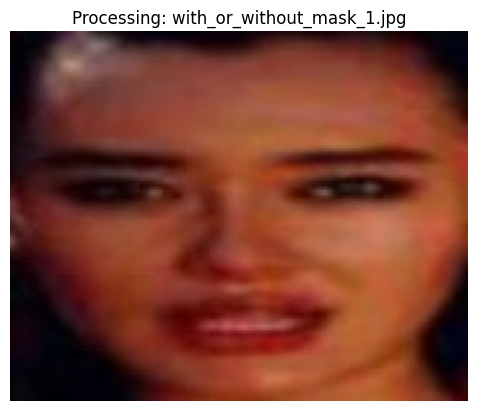

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
Prediction result for with_or_without_mask_1.jpg: [[0.9979976]]
Prediction: without_mask



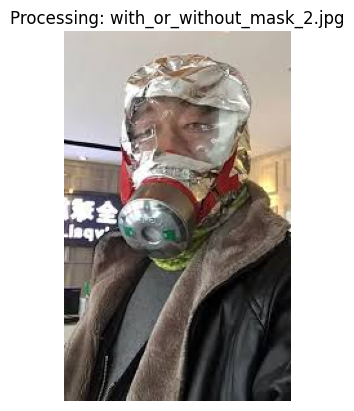

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Prediction result for with_or_without_mask_2.jpg: [[0.00025837]]
Prediction: with_mask



In [7]:

import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

image_paths = [
    '/content/drive/MyDrive/content/face_with_mask_or_without/dataset/single_prediction/with_or_without_mask_1.jpg',
    '/content/drive/MyDrive/content/face_with_mask_or_without/dataset/single_prediction/with_or_without_mask_2.jpg'
]

for img_path in image_paths:
    # טוענים ומציגים את התמונה
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Processing: {img_path.split("/")[-1]}') # מדפיס את שם הקובץ ככותרת
    plt.show()

    # מעבד את התמונה לבדיקה
    test_image = image.load_img(img_path, target_size=(64, 64))
    test_image = image.img_to_array(test_image)
    test_image = test_image / 255.0
    test_image = np.expand_dims(test_image, axis=0)

    # Predict using the trained CNN model
    result = cnn.predict(test_image)
    print(f"Prediction result for {img_path.split('/')[-1]}: {result}")

    # Interpret the result
    if result[0][0] > 0.5:
        prediction = 'without_mask'
    else:
        prediction = 'with_mask'

    print(f"Prediction: {prediction}\n")

In [ ]:
import os

# הגדרת שם הקובץ שברצונך לבדוק
filename = 'my_cnn_model.keras'

# הגדרת הנתיב הבסיסי שבו אתה מצפה למצוא את הקובץ.
# במקרה של גוגל קולאב, זה יהיה הנתיב לדרייב.
base_path = '/content/drive/MyDrive/'

# יצירת הנתיב המלא לקובץ
file_path = os.path.join(base_path, filename)

# בדיקה האם הקובץ קיים בנתיב
if os.path.exists(file_path):
    print(f'הקובץ "{filename}" נמצא בנתיב:')
    print(file_path)
else:
    print(f'הקובץ "{filename}" לא נמצא בנתיב: {file_path}')

הקובץ "my_cnn_model.keras" לא נמצא בנתיב: /content/drive/MyDrive/my_cnn_model.keras


In [ ]:
import shutil
#קטע הקוד הזה מעתיק תיקייה שלמה על כל תוכנה (כולל קבצים ותיקיות משנה) ממיקום אחד לאחר.
# Define the destination path in your Google Drive
destination_path = '/content/drive/MyDrive/content/face_with_mask_or_without'

# Use shutil.copytree to copy the entire directory
shutil.copytree(path, destination_path)

print(f"Dataset copied to Google Drive at: {destination_path}")

NameError: name 'path' is not defined

In [ ]:
import kagglehub
path = kagglehub.dataset_download("omkargurav/face-mask-dataset")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'face-mask-dataset' dataset.
Path to dataset files: /kaggle/input/face-mask-dataset


In [ ]:
import zipfile

zip_file = '/content/drive/MyDrive/content/face_with_mask_or_without/dataset/test_set/with_mask/with_mask.zip'  # הנתיב לקובץ הדחוס בדרייב


with zipfile.ZipFile(zip_file, 'r') as zip_ref:
  zip_ref.extractall('/content/drive/MyDrive/content/face_with_mask_or_without/dataset/test_set/with_mask')  # חילוץ הקבצים לתיקייה חדשה